In [1]:
import pandas as pd

from matplotlib import pyplot as plt, ticker as mticker

In [2]:
sic = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/noisy/weights_21021550_overwritten_sic.csv", index_col = 0)
trend = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/noisy/weights_21021550_overwritten_trend.csv", index_col = 0)
lsmask = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/noisy/weights_21021550_overwritten_lsmask.csv", index_col = 0)
t2m = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/noisy/weights_21021550_overwritten_t2m.csv", index_col = 0)
xwind = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/noisy/weights_21021550_overwritten_xwind.csv", index_col = 0)
ywind = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/noisy/weights_21021550_overwritten_ywind.csv", index_col = 0)

persistence = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/persistence.csv", index_col = 0)
baseline = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_21021550.csv", index_col = 0)

In [3]:
# Define met seasons

meteorological_seasons = [0,0,1,1,1,2,2,2,3,3,3,0]
seasonal_names = ['DJF', 'MAM', 'JJA', 'SON']
months = pd.date_range('2022-01-01','2023-01-01', freq='MS').strftime("%Y-%m-%d").tolist()

In [4]:
for i, idx in zip(range(len(months) - 1), meteorological_seasons):
    sic.loc[(sic.index >= months[i]) & (sic.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    trend.loc[(trend.index >= months[i]) & (trend.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    lsmask.loc[(lsmask.index >= months[i]) & (lsmask.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    t2m.loc[(t2m.index >= months[i]) & (t2m.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    xwind.loc[(xwind.index >= months[i]) & (xwind.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    ywind.loc[(ywind.index >= months[i]) & (ywind.index < months[i+1]), 'met_index'] = seasonal_names[idx]

    persistence.loc[(persistence.index >= months[i]) & (persistence.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    baseline.loc[(baseline.index >= months[i]) & (baseline.index < months[i+1]), 'met_index'] = seasonal_names[idx]


In [5]:
sic_seasons = sic.groupby('met_index', sort=False).mean()
trend_seasons = trend.groupby('met_index', sort=False).mean()
lsmask_seasons = lsmask.groupby('met_index', sort=False).mean()
t2m_seasons = t2m.groupby('met_index', sort=False).mean()
xwind_seasons = xwind.groupby('met_index', sort=False).mean()
ywind_seasons = ywind.groupby('met_index', sort=False).mean()

persistence_seasons = persistence.groupby('met_index', sort=False).mean()
baseline_seasons = baseline.groupby('met_index', sort=False).mean()

In [9]:
print(f"{trend_seasons['NIIEE_2']=}")

print(f"{baseline_seasons['NIIEE_2']=}")

trend_seasons['NIIEE_2']=met_index
DJF    31.168746
MAM    31.525379
JJA    30.216266
SON    20.498187
Name: NIIEE_2, dtype: float64
baseline_seasons['NIIEE_2']=met_index
DJF    31.267417
MAM    31.607748
JJA    29.419860
SON    20.963210
Name: NIIEE_2, dtype: float64


Text(0.5, 1.0, '2022 predictions with uniform noise')

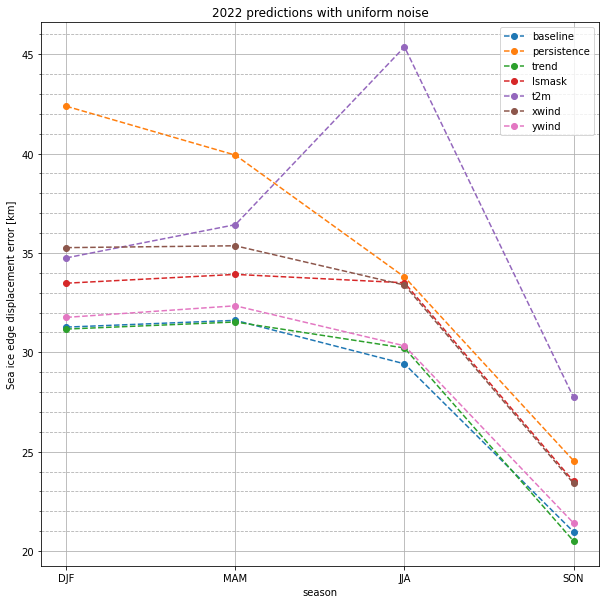

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
ax.plot(baseline_seasons['NIIEE_2'], 'o--', label = 'baseline')
ax.plot(persistence_seasons['NIIEE_2'], 'o--', label = 'persistence')

# ax.plot(sic_seasons['NIIEE_2'], 'o--', label = 'sic')
ax.plot(trend_seasons['NIIEE_2'], 'o--', label = 'trend')
ax.plot(lsmask_seasons['NIIEE_2'], 'o--', label = 'lsmask')
ax.plot(t2m_seasons['NIIEE_2'], 'o--', label = 't2m')
ax.plot(xwind_seasons['NIIEE_2'], 'o--', label = 'xwind')
ax.plot(ywind_seasons['NIIEE_2'], 'o--', label = 'ywind')

ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())


ax.set_xlabel('season')
ax.set_ylabel('Sea ice edge displacement error [km]')
plt.legend()
plt.grid(which = 'minor', ls = '--')
plt.grid(which = 'major')
ax.set_title('2022 predictions with uniform noise')